# Simulate the CT scan

In [1]:
import os
from gvxrPython3 import gvxr
# from gvxrPython3 import json2gvxr
# from gvxrPython3.JSON2gVXRDataReader import *
import json2gvxr
from JSON2gVXRDataReader import *

import SimpleITK as sitk

from cil.utilities.display import show_geometry
from cil.processors import TransmissionAbsorptionConverter
from cil.recon import FDK, FBP
from cil.utilities.jupyter import islicer

Fri Nov 17 13:59:22 2023 (WW) Spekpy is not installed, try Xpecgen instead.
Fri Nov 17 13:59:22 2023 (WW) Xpecgen is not installed either.


spekpy is not install, you won't be able to load a beam spectrum using spekpy
xpecgen is not install, you won't be able to load a beam spectrum using xpecgen
SimpleGVXR 2.0.7 (2023-11-06T17:42:00) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.7 (2023-11-06T17:42:00) [Compiler: GNU g++] on Linux


In [2]:
current_folder = str(globals()['_dh'][0])
data_path = "25OctoberData/"
JSON_fname = current_folder + "/" + data_path + "/simulation.json"

In [3]:
# Create an OpenGL context
# MS Windows
if os.name == "nt":
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
else:
    json2gvxr.initGVXR(JSON_fname, "EGL")

Create an OpenGL context: 800x600


Fri Nov 17 13:59:23 2023 ---- Create window (ID: -1)
Fri Nov 17 13:59:23 2023 ---- Query the number of EGL devices
Fri Nov 17 13:59:23 2023 ---- Success
Fri Nov 17 13:59:23 2023 ---- Detected 2 EGL devices.
Fri Nov 17 13:59:23 2023 ---- Print the details here of every EGL device.
Fri Nov 17 13:59:23 2023 ---- Success
Fri Nov 17 13:59:23 2023 ---- Device 1/2:
Fri Nov 17 13:59:23 2023 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Fri Nov 17 13:59:23 2023 ---- Device 2/2:
Fri Nov 17 13:59:23 2023 ---- 	Device Extensions: EGL_MESA_device_software
Fri Nov 17 13:59:23 2023 (WW) 	Software rendering with Mesa will be used with this device
Fri Nov 17 13:59:23 2023 ---- Initialise EGL
Fri Nov 17 13:59:23 2023 ---- EGL client extensions:
Fri Nov 17 13:59:23 2023 ---- EGL_EXT_platform_base EGL_EXT_device_base EGL_EXT_device_enumeration EGL_EXT_device_query EGL_KHR_client_get_all_proc_addresses EG

In [4]:
json2gvxr.initDetector(JSON_fname)
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()
json2gvxr.initSamples()

Set up the detector
	Detector position: [75.6598372310744, 188.43677107031664, 7.055750057693192, 'mm']
	Detector up vector: [0.0, 0.0, -1.0]
	Number of pixels: [640, 480]
	Detector number of pixels: [640, 480]
	Pixel spacing: [0.22999999523162842, 0.2300000031789144, 'mm']
Set up the beam
	Source position: [-33.204827604251534, -76.63451982186366, 38.22599658848194, 'mm']
	Source shape: PointSource


Fri Nov 17 13:59:23 2023 ---- Initialise the renderer
Fri Nov 17 13:59:23 2023 ---- file_name:	/home/fpvidal/PROGRAMMING/GitHub/MyProjects/25OctoberData/../Rabbit.stl	nb_faces:	75710	nb_vertices:	227130	bounding_box (in cm):	(-1.14473, -1.27, -1.20062)	(1.14473, 1.27, 1.20062)


In [5]:
json2gvxr.initScan()

Set up the CT Scan


In [6]:
reader = JSON2gVXRDataReader(file_name=JSON_fname)
data = reader.read(verbose=1)

Detecotr size: [147.1999969482422, 110.4000015258789, 'mm'] mm
Source position: [-33.2048276  -76.63451982 -38.22599659] mm
Detector position: [ 75.65983723 188.43677107  -7.05575006] mm
Ray direction: [0.37767941 0.9196002  0.10813757]
Rotation axis: [-0. -0. -1.]
Rotation axis position: [ -2.36595583  -1.61343861 -31.72220802] mm
Angles: [  0.    3.6   7.2  10.8  14.4  18.   21.6  25.2  28.8  32.4  36.   39.6
  43.2  46.8  50.4  54.   57.6  61.2  64.8  68.4  72.   75.6  79.2  82.8
  86.4  90.   93.6  97.2 100.8 104.4 108.  111.6 115.2 118.8 122.4 126.
 129.6 133.2 136.8 140.4 144.  147.6 151.2 154.8 158.4 162.  165.6 169.2
 172.8 176.4 180.  183.6 187.2 190.8 194.4 198.  201.6 205.2 208.8 212.4
 216.  219.6 223.2 226.8 230.4 234.  237.6 241.2 244.8 248.4 252.  255.6
 259.2 262.8 266.4 270.  273.6 277.2 280.8 284.4 288.  291.6 295.2 298.8
 302.4 306.  309.6 313.2 316.8 320.4 324.  327.6 331.2 334.8 338.4 342.
 345.6 349.2 352.8 356.4 360. ] degrees
distance: 2.305775013254467
[640, 48

In [7]:
print(data.geometry)

3D Cone-beam tomography
System configuration:
	Source position: [-33.2048276 , -76.63451982, -38.22599659]
	Rotation axis position: [ -2.36595583,  -1.61343861, -31.72220802]
	Rotation axis direction: [-0., -0., -1.]
	Detector position: [ 75.65983723, 188.43677107,  -7.05575006]
	Detector direction x: [-0.9250246 ,  0.37990721,  0.        ]
	Detector direction y: [-0., -0., -1.]
Panel configuration:
	Number of pixels: [640 480]
	Pixel size: [0.23 0.23]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 101
	Angles 0-20 in degrees:
[ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6,
 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4]
Distances in units: mm


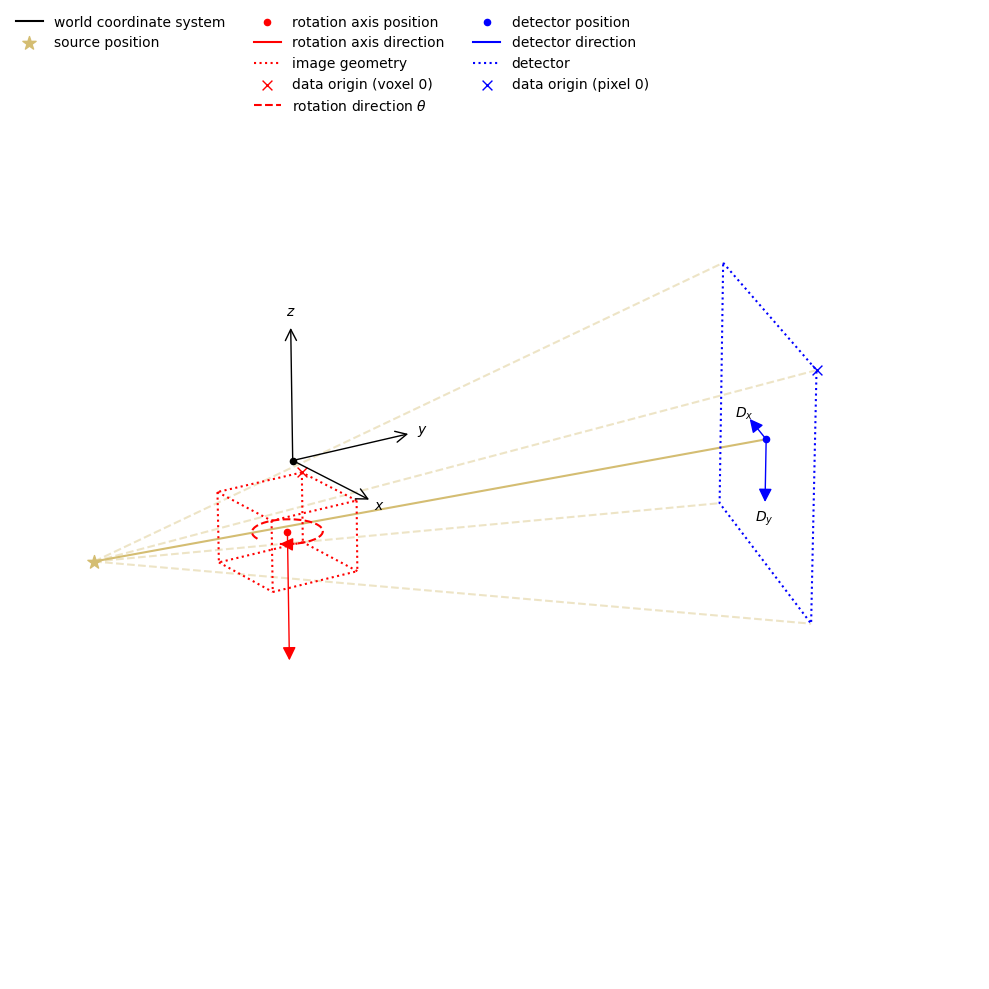

In [8]:
show_geometry(data.geometry)

In [9]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [10]:
ig = data.geometry.get_ImageGeometry()

recons = FDK(data_corr, ig).run()
# recons = FBP(data_corr, ig).run()

FDK recon

Input Data:
	angle: 101
	vertical: 480
	horizontal: 640

Reconstruction Volume:
	vertical: 480
	horizontal_y: 640
	horizontal_x: 640

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



In [11]:
islicer(recons, direction='vertical')

In [12]:
islicer(recons, direction='horizontal_x')